<a href="https://colab.research.google.com/github/Akshat-Math/Covid-19_Detection_using_CNN/blob/main/Covid_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import os
import cv2
from keras.applications.vgg16 import preprocess_input

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_dir =  '/content/drive/My Drive/data/covid/train'
test_dir =  '/content/drive/My Drive/data/covid/test'

In [5]:
train_len = len(os.listdir(train_dir))
print(train_len)
test_len = len(os.listdir(test_dir))
print(test_len)

2
2


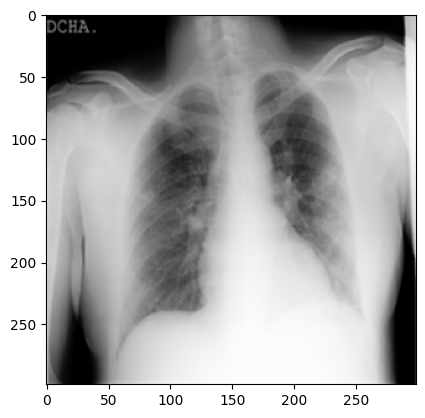

(299, 299, 3)

In [6]:
#original training data
CATEGORIES = ["covid","normal"]
for category in CATEGORIES:
  path = os.path.join(train_dir,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(img_array)
    plt.show()
    break
  break

img_array.shape

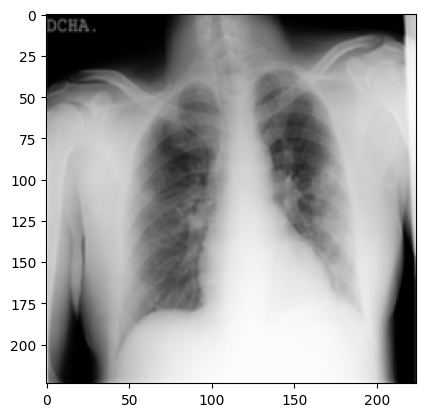

(224, 224, 3)

In [7]:
#resized training data
CATEGORIES = ["covid","normal"]
for category in CATEGORIES:
  path = os.path.join(train_dir,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    new_array = cv2.resize(img_array,(224,224))
    plt.imshow(new_array)
    plt.show()
    break
  break

new_array.shape

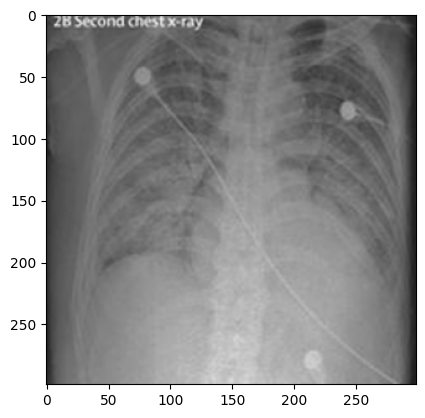

(299, 299, 3)

In [8]:
#original testing data
CATEGORIES = ["covid","normal"]
for category in CATEGORIES:
  path = os.path.join(test_dir,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(img_array)
    plt.show()
    break
  break

img_array.shape

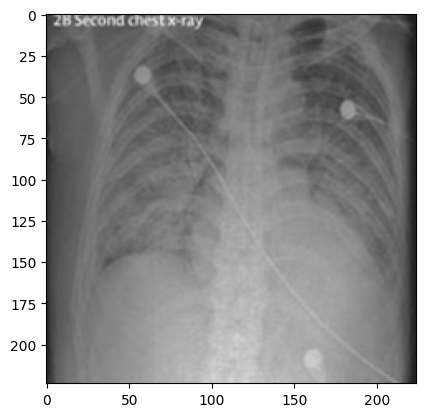

(224, 224, 3)

In [9]:
#resized training data
CATEGORIES = ["covid","normal"]
for category in CATEGORIES:
  path = os.path.join(test_dir,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    new_array = cv2.resize(img_array,(224,224))
    plt.imshow(new_array)
    plt.show()
    break
  break

new_array.shape

In [10]:
#making training data of 80x80
training_data = []
def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(train_dir,category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
          img_array = cv2.imread(os.path.join(path,img))
          new_array = cv2.resize(img_array,(224,224,3))
          training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_training_data()

In [11]:
#making validation data of 224x224
validation_data = []
def create_validation_data():
  for category in CATEGORIES:
    path_val = os.path.join(test_dir,category)
    class_num_val = CATEGORIES.index(category)
    for img in os.listdir(path_val):
      try:
          img_array_val = cv2.imread(os.path.join(path_val,img))
          new_array_val = cv2.resize(img_array_val,(224,224,3))
          validation_data.append([new_array_val,class_num_val])
      except Exception as e:
        pass
create_validation_data()

In [12]:
print(len(training_data))
print(len(validation_data))

0
0


In [13]:
#shuffling the data
import random
random.shuffle(training_data)
random.shuffle(validation_data)

In [14]:
for sample in training_data[:5]:
  print(sample[1])

In [15]:
model = Sequential()

In [16]:
#CNN model in Keras
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (224,224,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [17]:
# as we have less datas so we are running data genrator this is train genrator the them rotate the image and do manupulation to gen new image from existing one
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/data/covid/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 200 images belonging to 2 classes.


In [19]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [20]:
test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/data/covid/test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 300 images belonging to 2 classes.


In [21]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 5,
    epochs = 15,
    validation_data = test_generator,
    validation_steps = 2
)

<ipython-input-21-124d3e032eab>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/15
5/5 [==============================] - 18s 695ms/step - loss: 1.3516 - accuracy: 0.4338 - val_loss: 0.6871 - val_accuracy: 0.5781
Epoch 2/15
5/5 [==============================] - 3s 508ms/step - loss: 0.6980 - accuracy: 0.4853 - val_loss: 0.6979 - val_accuracy: 0.3281
Epoch 3/15
5/5 [==============================] - 3s 521ms/step - loss: 0.7059 - accuracy: 0.5147 - val_loss: 0.6865 - val_accuracy: 0.6094
Epoch 4/15
5/5 [==============================] - 4s 934ms/step - loss: 0.6878 - accuracy: 0.4875 - val_loss: 0.6875 - val_accuracy: 0.7188
Epoch 5/15
5/5 [==============================] - 3s 617ms/step - loss: 0.6862 - accuracy: 0.5147 - val_loss: 0.6834 - val_accuracy: 0.6875
Epoch 6/15
5/5 [==============================] - 3s 615ms/step - loss: 0.6865 - accuracy: 0.5735 - val_loss: 0.6843 - val_accuracy: 0.8281
Epoch 7/15
5/5 [==============================] - 4s 822ms/step - loss: 0.6856 - accuracy: 0.5562 - val_loss: 0.6610 - val_accuracy: 0.8906
Epoch 8/15
5/5 [===

In [22]:
model.evaluate_generator(train_generator)

<ipython-input-22-e4ade065aa26>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator)


[0.5879570245742798, 0.6800000071525574]

In [23]:
model.evaluate_generator(test_generator)

<ipython-input-23-faa0e9406f88>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator)


[0.5826622247695923, 0.79666668176651]

In [24]:
#saving model with the name of covid.h5
model.save('/content/drive/My Drive/covid/covid.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

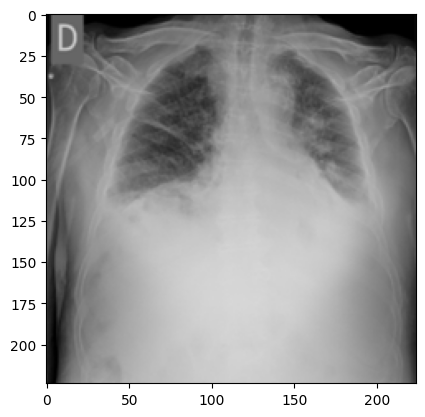

1/1 [==============================] - 0s 386ms/step
COVID


In [26]:
# Load the image using OpenCV
path = "/content/drive/My Drive/covid/COVID-2570.png"
img_array = cv2.imread(path)
new_array = cv2.resize(img_array, (224, 224))
plt.imshow(new_array)
plt.show()

# Preprocess the image for prediction
img = preprocess_input(new_array)  # Preprocess using VGG16 preprocessing
img = np.expand_dims(img, axis=0)  # Expand dimensions to match model input

# Load the saved model
saved_model = load_model("/content/drive/My Drive/covid/covid.h5")

# Make prediction
output = saved_model.predict(img)

# Display prediction result
if output[0][0] > 0.5:  # Threshold for binary classification
    print("COVID")
else:
    print('NORMAL')